<a href="https://colab.research.google.com/github/gordon0003/Agenda_persanal/blob/main/Copia_de_Inmersi%C3%B3nDatos_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Inmersión Datos 3**

Vamos a traer datos estadísticos de la ciudad de Bogotá, directamente del DANE y vamos a ver como estos datos nos ayudarían en inclusión de nuevas variables para el cálculo del precio de los inmuebles en la ciudad de Bogotá.

Encuesta Multiproposito de Bogotá para obtener información socio-económica y de entorno urbano de los habitantes de Bogotá para la formulación, seguimiento y evaluación de las políticas distritales.

https://microdatos.dane.gov.co/index.php/catalog/743


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
#Datos cap A de Bogotá

datos_raw = pd.read_csv('/content/drive/MyDrive/Identificación (Capítulo A).csv', sep = ';',encoding='latin-1')
datos_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.0,11,11001,1,14.0,Los Mártires,37.0,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.0,11,11001,1,1.0,Usaquén,803.0,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.0,11,11001,1,1.0,Usaquén,803.0,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [ ]:
#Tomamos únicamente las clases que nos importan, las de Bogotá

datos_raw = datos_raw.loc[datos_raw.MPIO == 11001]
datos_raw.shape

(86504, 11)

In [ ]:
#Tomamos más tablas de información sobre datos que nos interesan

datos_a = datos_raw
datos_b = pd.read_csv('/content/drive/MyDrive/Datos de la vivenda y su entorno (Capítulo B).csv',sep=';',encoding='latin-1')
datos_c = pd.read_csv('/content/drive/MyDrive/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
datos_e = pd.read_csv('/content/drive/MyDrive/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
datos_h = pd.read_csv('/content/drive/MyDrive/Educación (Capitulo H).csv',sep=';',encoding='latin-1')
datos_l = pd.read_csv('/content/drive/MyDrive/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv',sep=';',encoding='latin-1')
datos_k = pd.read_csv('/content/drive/MyDrive/Fuerza de trabajo (Capítulo K).csv',sep=';',encoding='latin-1')

<ipython-input-7-6c270f2a121d>:5: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv('/content/drive/MyDrive/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
<ipython-input-7-6c270f2a121d>:6: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv('/content/drive/MyDrive/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
<ipython-input-7-6c270f2a121d>:7: DtypeWarning: Columns (26,81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv('/content/drive/MyDrive/Educación (Capitulo H).csv',sep=';',encoding='latin-1')
<ipython-input-7-6c270f2a121d>:8: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_l = pd.read_csv('/content/drive/MyDrive/Percepc

In [ ]:
datos_dane = pd.merge(datos_a,datos_b, on='DIRECTORIO', how='left')
datos_dane.shape

(86504, 73)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_c, on='DIRECTORIO', how='left')
datos_dane.shape

(87061, 214)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_e, on='DIRECTORIO', how='left')
datos_dane.shape

<ipython-input-14-9f757f86689d>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane,datos_e, on='DIRECTORIO', how='left')


(238559, 281)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_h, on='DIRECTORIO', how='left')
datos_dane.shape

(783952, 416)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_l, on='DIRECTORIO', how='left')
datos_dane.shape

<ipython-input-16-10307e0abd73>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'DIRECTORIO_HOG_x', 'FEX_C_x', 'SECUENCIA_P_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane,datos_l, on='DIRECTORIO', how='left')


(867264, 594)

##**Inmersión Datos 4**

In [ ]:
#Ponemos la base de datos tratada

import pandas as pd

datos_dane = pd.read_csv('/content/drive/MyDrive/datos_dane.csv')
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.0,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.0
1,3004369.0,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.0
2,3004375.0,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.0,NaN,11.0
3,3004380.0,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.0
4,3004383.0,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.0


In [ ]:
#Realizamos un renombramiento con un diccionario dado para reordenar apropiadamente los datos
#El diccionario nos permite analizar los datos con mayor precisión, sabiendo qué representa cada columna

dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns = dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [ ]:
#Veremos la información de la base de datos
#Los números representan la cantidad de personas que respondieron

datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [ ]:
#Ahora tomamos el promedio para información socioeconómica relevante
#El valor representado [1,2] es equivalente a: 1 = Si, 2 = No
#De esta manera, se transforma una respuesta booleana a una respuesta cuantificable, esto está promediado

datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.893333,1.186667,1.853333,1.893333,1.560000,1.840000,1.493860e+06,1.160000,1.920000,1.680000,1.800000
Américas,1.383178,1.252336,1.981308,1.785047,1.607477,1.915888,2.672138e+06,1.056075,1.971963,1.719626,1.850467
Apogeo,1.650794,1.301587,1.746032,1.936508,1.682540,2.000000,1.837583e+06,1.079365,1.920635,1.650794,1.920635
Arborizadora,1.430108,1.301075,1.946237,1.881720,1.688172,1.838710,1.802297e+06,1.032258,1.881720,1.612903,1.817204
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.367347,1.326531,1.989796,1.979592,1.704082,1.867347,2.943731e+06,1.051020,1.948980,1.704082,1.938776


In [ ]:
#Hacemos un reemplazo para determinar las respuesta positivas y negativas de cada barrio

datos = datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.0,1.0,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.0,1.0,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.0,1.0,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.0,1.0,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.0,1.0,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.0,1.0,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.0,1.0,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.0,1.0,0,1,0


In [ ]:
#Escribamos un barrio en concreto

datos.loc[datos.NOMBRE_ESTRATO == '20 de Julio']

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
513,20 de Julio,0,0,0,0,1,0,98.0,1.0,0,1,0
706,20 de Julio,0,1,0,0,1,0,908000.0,1.0,0,0,1
707,20 de Julio,0,1,0,0,1,0,1800000.0,1.0,0,0,0
708,20 de Julio,0,1,0,0,1,0,1200000.0,1.0,0,0,0
709,20 de Julio,0,1,0,1,1,0,2000000.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,20 de Julio,0,1,0,0,0,1,400000.0,1.0,1,1,1
8751,20 de Julio,0,0,0,0,0,0,906000.0,1.0,0,0,1
8752,20 de Julio,0,1,0,0,0,1,1200000.0,1.0,0,0,0
8783,20 de Julio,0,1,1,0,0,0,1200000.0,1.0,0,0,1


In [ ]:
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.106667,0.813333,0.146667,0.106667,0.440000,0.160000,1.493860e+06,0.840000,0.080000,0.320000,0.200000
Américas,0.616822,0.747664,0.018692,0.214953,0.392523,0.084112,2.672138e+06,0.943925,0.028037,0.280374,0.149533
Apogeo,0.349206,0.698413,0.253968,0.063492,0.317460,0.000000,1.837583e+06,0.920635,0.079365,0.349206,0.079365
Arborizadora,0.569892,0.698925,0.053763,0.118280,0.311828,0.161290,1.802297e+06,0.967742,0.118280,0.387097,0.182796
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.632653,0.673469,0.010204,0.020408,0.295918,0.132653,2.943731e+06,0.948980,0.051020,0.295918,0.061224
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.897436,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
Venecia,0.472222,0.819444,0.236111,0.291667,0.500000,0.361111,2.078713e+06,0.833333,0.138889,0.402778,0.250000
Verbenal,0.771429,0.561905,0.076190,0.028571,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714


In [ ]:
#Añadimos la base de inmuebles y vamos a unir las dos bases de datos

inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')

pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,0.592593,0.518519,0.014815,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,0.774194,0.580645,0.118280,0.107527,0.344086,0.129032,2.794784e+06,0.935484,0.086022,0.301075,0.182796
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,0.785714,0.223810,0.000000,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,0.897436,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,0.849673,0.418301,0.000000,0.019608,0.274510,0.006536,4.832843e+06,0.960784,0.019608,0.163399,0.091503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,0.628571,0.614286,0.028571,0.171429,0.428571,0.085714,2.144186e+06,0.914286,0.071429,0.257143,0.185714
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,0.708955,0.492537,0.022388,0.149254,0.417910,0.089552,4.177179e+06,0.925373,0.022388,0.119403,0.067164
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,0.482759,0.706897,0.034483,0.172414,0.465517,0.258621,2.356995e+06,0.896552,0.051724,0.224138,0.206897
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,0.239130,0.869565,0.021739,0.108696,0.543478,0.130435,1.418653e+06,0.847826,0.021739,0.391304,0.065217


In [ ]:
#Asignamos esta base de datos a una variable que utilizaremos para hacer Machine Learning

datos_ml = pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Baños                     9520 non-null   int64  
 4   Área                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   CONJUNTO_CERRADO          9366 non-null   float64
 9   INSEGURIDAD               9366 non-null   float64
 10  TERMINALES_BUS            9366 non-null   float64
 11  BARES_DISCO               9366 non-null   float64
 12  RUIDO                     9366 non-null   float64
 13  OSCURO_PELIGROSO          9366 non-null   float64
 14  SALARIO_

In [ ]:
#Cargamos los códigos upz para un mejor manejo de los datos, pues los códigos de cada UPZ nos permite hacer regresión

upz = pd.read_csv('/content/drive/MyDrive/cod_upz.csv')
datos_ml = pd.merge(datos_ml,upz,left_on='UPZ',right_on='NOMBRE_ESTRATO', how='inner')
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,CONJUNTO_CERRADO,INSEGURIDAD,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,0.592593,0.518519,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,0.592593,0.518519,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,0.592593,0.518519,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,0.592593,0.518519,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,0.592593,0.518519,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0


In [ ]:
#Visualizemos la nueva base de datos

datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Baños                     9318 non-null   int64  
 4   Área                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   CONJUNTO_CERRADO          9318 non-null   float64
 9   INSEGURIDAD               9318 non-null   float64
 10  TERMINALES_BUS            9318 non-null   float64
 11  BARES_DISCO               9318 non-null   float64
 12  RUIDO                     9318 non-null   float64
 13  OSCURO_PELIGROSO          9318 non-null   float64
 14  SALARIO_

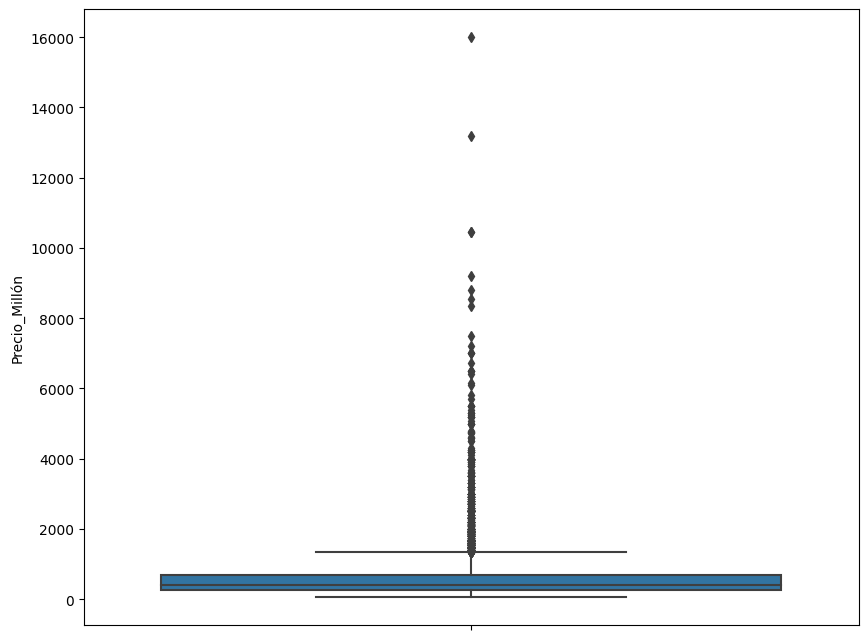

In [ ]:
#Visualizar datos estadísiticos

import matplotlib.pyplot as plt
import seaborn as sns

#Creamos la variable Precio Millón como float (revisar InmersiónDatos_2)
valor = datos_ml.Valor.str.split(expand=True)
datos_ml['Moneda'] = valor[0]  
datos_ml['Precio'] = valor[1]  
datos_ml['Precio'] = datos_ml['Precio'].str.replace('.','',regex=True)
datos_ml['Precio_Millón'] = datos_ml.Precio.astype('float') / 1000000

plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio_Millón')
plt.show()

In [ ]:
#Filtramos los inmuebles según el costo para un estudio más específico

datos_ml.query('Precio_Millón > 5000 & Precio_Millón < 60')

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,CONJUNTO_CERRADO,INSEGURIDAD,...,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO,Moneda,Precio,Precio_Millón


In [ ]:
#Asignamos estos nuevos datos filtrados para mejorar nuestro modelo

datos_ml = datos_ml.query('Precio_Millón < 1200 & Precio_Millón > 60')
datos_ml

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,CONJUNTO_CERRADO,INSEGURIDAD,...,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO,Moneda,Precio,Precio_Millón
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,0.592593,0.518519,...,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,$,360000000,360.0
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,0.592593,0.518519,...,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,$,300000000,300.0
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,0.592593,0.518519,...,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,$,239000000,239.0
9,Casa,Casa en venta en Zona Noroccidental,5,2,200,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 580.000.000,0.592593,0.518519,...,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,$,580000000,580.0
10,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 278.000.000,0.592593,0.518519,...,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,$,278000000,278.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,0.771429,0.561905,...,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,$,250000000,250.0
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,0.771429,0.561905,...,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,$,180000000,180.0
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,0.771429,0.561905,...,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,$,180000000,180.0
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,0.771429,0.561905,...,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,$,240000000,240.0


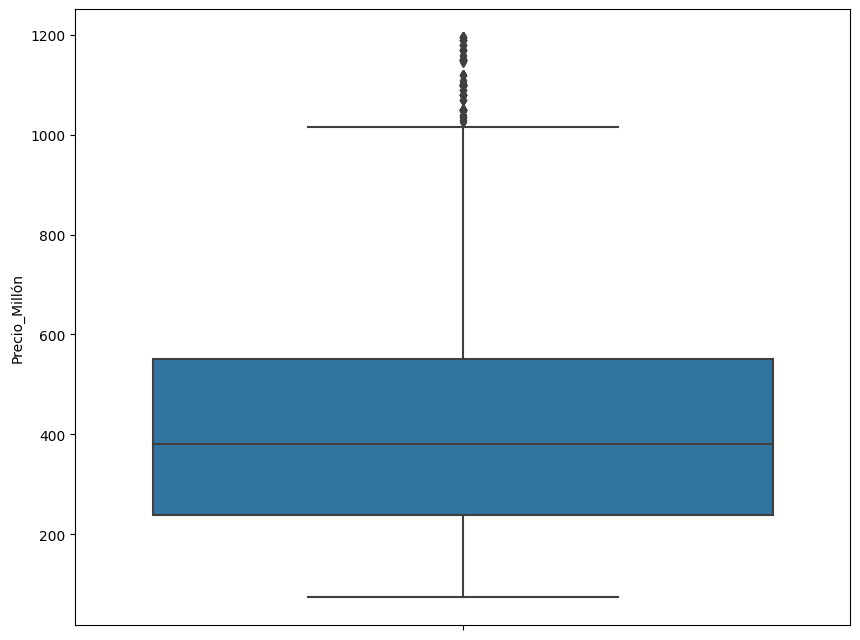

In [ ]:
#Realizamos una nueva gráfica para ver las variaciones

plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio_Millón')
plt.show()

In [ ]:
#Creamos una nueva columna de datos sobre salario anual en base al salario mensual

datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000
datos_ml['SALARIO_ANUAL_MI']

0       48.417456
1       48.417456
3       48.417456
9       48.417456
10      48.417456
          ...    
9313    29.344838
9314    29.344838
9315    29.344838
9316    29.344838
9317    29.344838
Name: SALARIO_ANUAL_MI, Length: 8313, dtype: float64

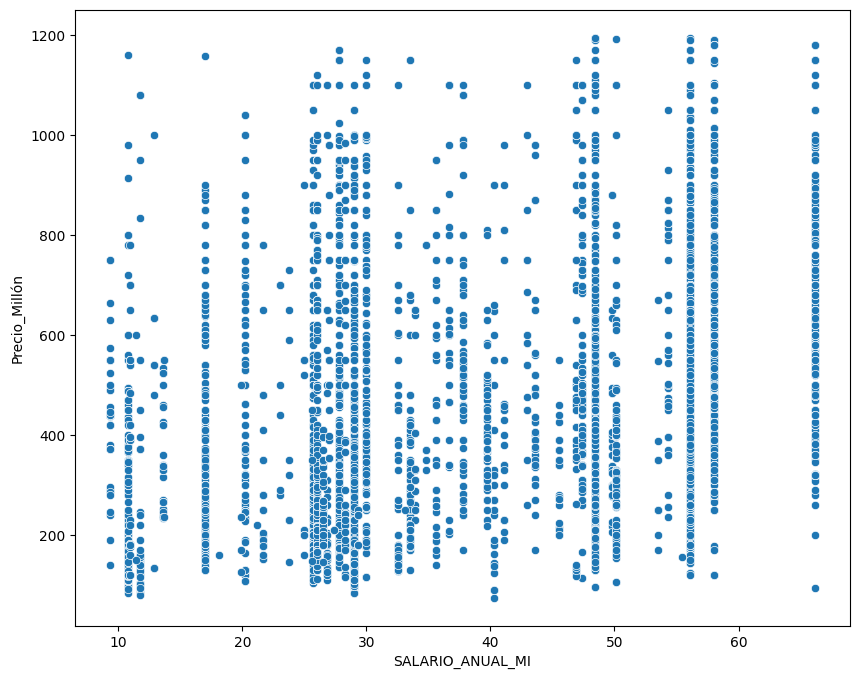

In [ ]:
#Creamos un gráfico 

plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml, x='SALARIO_ANUAL_MI',y ='Precio_Millón')
plt.show()

In [ ]:
#Crear un mapa de correlación entre variables, varia entre -1 a 1 como no correlación a relación directa (misma variable)

datos_ml.corr()

,Habitaciones,Baños,Área,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,Precio_Millón,SALARIO_ANUAL_MI
Habitaciones,1.000000,0.437944,0.026425,-0.116781,0.130780,0.082567,0.108246,0.142071,0.113696,-0.173701,-0.075084,0.066055,0.128659,0.092329,-0.119178,0.180190,-0.173701
Baños,0.437944,1.000000,0.038967,0.160765,-0.192636,-0.167372,-0.117368,-0.169937,-0.213476,0.180707,0.125254,-0.087964,-0.151305,-0.078863,0.011584,0.657343,0.180707
Área,0.026425,0.038967,1.000000,-0.008843,-0.004490,-0.009574,-0.009502,-0.001511,0.008433,-0.008979,-0.006919,0.016999,0.008122,0.010482,-0.008786,0.044533,-0.008979
CONJUNTO_CERRADO,-0.116781,0.160765,-0.008843,1.000000,-0.844006,-0.300256,-0.506335,-0.700831,-0.665775,0.807853,0.609080,-0.345390,-0.782178,0.054712,0.084535,0.319729,0.807853
INSEGURIDAD,0.130780,-0.192636,-0.004490,-0.844006,1.000000,0.508933,0.604341,0.847356,0.746604,-0.816117,-0.558349,0.294608,0.738474,0.087177,0.002619,-0.370115,-0.816117
TERMINALES_BUS,0.082567,-0.167372,-0.009574,-0.300256,0.508933,1.000000,0.394339,0.669703,0.574392,-0.514077,-0.302773,0.173727,0.358281,0.253485,-0.094974,-0.278653,-0.514077
BARES_DISCO,0.108246,-0.117368,-0.009502,-0.506335,0.604341,0.394339,1.000000,0.603201,0.494219,-0.383820,-0.253188,-0.018513,0.325239,-0.054525,0.263224,-0.228913,-0.383820
RUIDO,0.142071,-0.169937,-0.001511,-0.700831,0.847356,0.669703,0.603201,1.000000,0.653101,-0.765156,-0.613557,0.287440,0.668498,0.166782,-0.113183,-0.345588,-0.765156
OSCURO_PELIGROSO,0.113696,-0.213476,0.008433,-0.665775,0.746604,0.574392,0.494219,0.653101,1.000000,-0.764007,-0.510500,0.427817,0.689976,0.221050,-0.015666,-0.378880,-0.764007
SALARIO_MES,-0.173701,0.180707,-0.008979,0.807853,-0.816117,-0.514077,-0.383820,-0.765156,-0.764007,1.000000,0.531295,-0.470072,-0.771743,-0.298044,0.389079,0.419877,1.000000


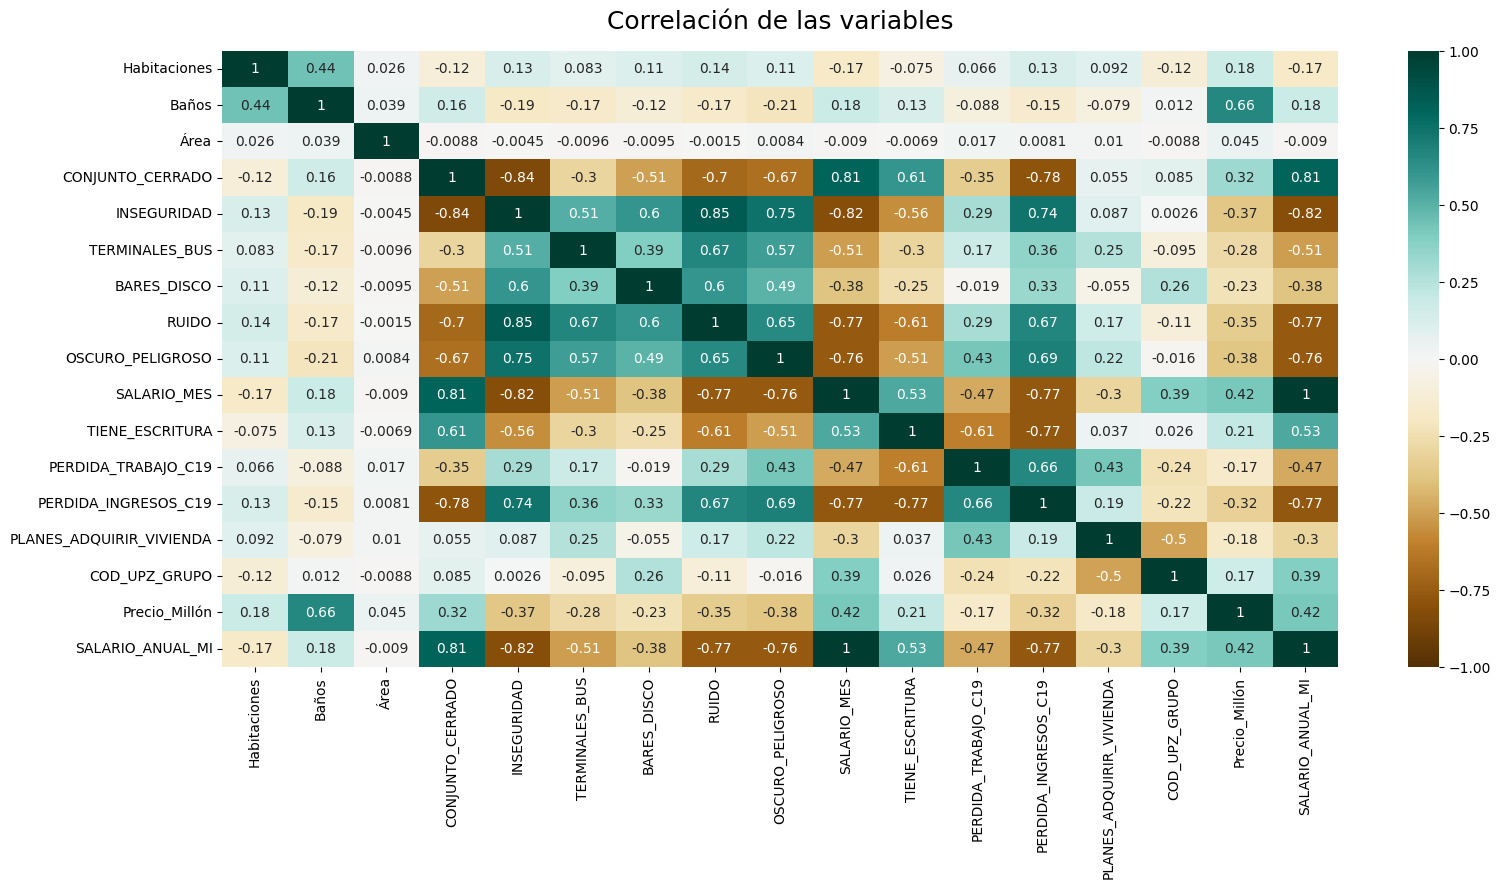

In [ ]:
#Generamos una mejor gráfica para visualizar la correlación

#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

In [ ]:
#Trabajemos con Machine Learning!!

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Matrices para trabajar

X = datos_ml[['COD_UPZ_GRUPO']]
y = datos_ml['Precio_Millón']

#Hacemos el entrenamiento con el 25% de los datos

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=99)

#Y visualizamos los datos

In [ ]:
X_train

,COD_UPZ_GRUPO
1512,817.0
7864,85.0
6058,21.0
1683,817.0
2481,14.0
...,...
6038,21.0
8875,102.0
2200,14.0
3883,803.0


In [ ]:
X_test

,COD_UPZ_GRUPO
6340,74.0
7805,85.0
4902,47.0
7041,100.0
2436,14.0
...,...
3323,14.0
3945,803.0
5572,27.0
3633,803.0


In [ ]:
y_train

1512    1050.000000
7864     129.000000
6058     206.375776
1683     650.000000
2481     250.000000
           ...     
6038     560.000000
8875     560.000000
2200     685.000000
3883     850.000000
8154     132.000000
Name: Precio_Millón, Length: 6234, dtype: float64

In [ ]:
y_test

6340    199.9
7805    120.8
4902    400.0
7041    340.0
2436    355.0
        ...  
3323    700.0
3945    510.0
5572    220.0
3633    420.0
3652    435.6
Name: Precio_Millón, Length: 2079, dtype: float64

In [ ]:
#Aplicamos la regresión, es decir, aplicamos el Machine Learning

modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Podemos hacer predicciones!

y_predict_test = modelo.predict(X_test)

#Hacemos una validación de nuestro modelo, saber si es correcto

from sklearn.metrics import mean_absolute_error, r2_score

baseline_mae = mean_absolute_error(y_test, y_predict_test) #error promedio entre la predicción y la realidad en millones de pesos
baseline_r2 = r2_score(y_test, y_predict_test) #rendimiento del modelo, evaluado entre -1 y 1 siendo -1 el peor resultado y 1 el mejor resultado
print(baseline_mae,baseline_r2)

187.323609443345 0.031111799984413713


In [ ]:
#Tomamos más variables a analizar

X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Baños','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']] 

y = datos_ml["Precio_Millón"]

#Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

#Aplicar regresión
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)

#Predicción
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)

#Error
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

#Imprimimos el resultado de los errores y el rendimiento
print(mae_test,r2_test)
print(mae_train,r2_train)

118.25967274431333 0.5404735562069192
123.22271988681676 0.5269614226488988


In [ ]:
#Hagamos una predicción para un modelo particular
#Consideremos una zona específica (Cod de UPZ=816) con 3 habitaciones, 2 baños, está en conjunto cerrado (1), con 50 millones de pesos de ingreso y con escritura (1)

modelo_1.predict([[816,3,2,1,50,1]])

#El resultado nos dice que el inmueble costará aproximadamente 434 millones de pesos

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([434.21129691])

##**Desafío**

In [ ]:
#Se trabaja con una base de datos uniendo inmuebles, los datos tratados y los códigos de upz

#A la base de datos inmuebles se añade la columna de precio millón y valor m2 por barrio

valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]  
inmuebles['Precio'] = valor[1]  
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles['Precio_Millón'] = inmuebles.Precio.astype('float') / 1000000
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millón']/datos_barrio['Área']
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)

#Se asigna una variable para crear la base de datos unida

datos_ml_d = pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
datos_ml_d = pd.merge(datos_ml_d,upz,left_on='UPZ',right_on='NOMBRE_ESTRATO', how='inner')

In [ ]:
#Se filtra para los inmuebles cuyo precio, en millones de pesos, se encuentre entre 60 y 1000.
#Con esto se elimina los datos exepcionales que pueden causar problemas a la hora del análisis por Machine Learning.

datos_ml_d_1 = datos_ml_d.query('Precio_Millón < 1200 & Precio_Millón > 60')

#Matrices para trabajar. Tomamos variables diferentes a las utilizadas en clase

X1 = datos_ml_d_1[['Área','INSEGURIDAD','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TERMINALES_BUS']]
y1 = datos_ml_d_1['Precio_Millón']

#Hacemos el entrenamiento con el 95% de los datos

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.95, random_state=1)

#Aplicamos el modelo

modelo_d_1 = LinearRegression()
modelo_d_1.fit(X1_train, y1_train)
y1_predict_test = modelo_d_1.predict(X1_test)
y1_predict_train = modelo_d_1.predict(X1_train)
mae1_test = mean_absolute_error(y1_test, y1_predict_test)
r2_1_test = r2_score(y1_test, y1_predict_test)
mae1_train = mean_absolute_error(y1_train, y1_predict_train)
r2_1_train = r2_score(y1_train, y1_predict_train)
print(mae1_test,r2_1_test)
print(mae1_train,r2_1_train)

173.71450847847663 0.18215402991999596
181.0840816051171 0.1916647650775426


In [ ]:
#Para un valor específico
#Estimemos el valor de un inmueble de 250m2 donde no haya inseguridad, exista bares_discotecas, que no sea oscuro/peligroso
#Para un sueldo de 2 millones de pesos mensuales y que haya terminales de bus

modelo_especifico1 = modelo_d_1.fit(X1_train.values, y1_train.values)

prediccion_mod1 = modelo_especifico1.predict([[250,0,1,0,0,2000000,1]])
prediccion_mod1

array([288.29494944])

In [ ]:
#Ahora, tomemos muchos datos y hagamos una predicción en un caso real. 
#Primero, creamos una nueva variable

datos_ml_d['Salario_mes_millón'] = datos_ml_d['SALARIO_MES'] / 1000000

datos_ml_d_2 = datos_ml_d.query('Precio_Millón < 2500 & Precio_Millón > 60') #mayor cantidad de datos

#Matrices para trabajar. Tomamos 10 datos

X2 = datos_ml_d_2[['COD_UPZ_GRUPO','Habitaciones','Baños','TIENE_ESCRITURA','Área','INSEGURIDAD','RUIDO','Salario_mes_millón','PERDIDA_INGRESOS_C19']]
y2 = datos_ml_d_2['Precio_Millón']

#Hacemos el entrenamiento con el 95% de los datos

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.95, random_state=2)

#Aplicamos el modelo

modelo_d_2 = LinearRegression()
modelo_d_2.fit(X2_train, y2_train)
y2_predict_test = modelo_d_2.predict(X2_test)
y2_predict_train = modelo_d_2.predict(X2_train)
mae2_test = mean_absolute_error(y2_test, y2_predict_test)
r2_2_test = r2_score(y2_test, y2_predict_test)
mae2_train = mean_absolute_error(y2_train, y2_predict_train)
r2_2_train = r2_score(y2_train, y2_predict_train)
print(mae2_test,r2_2_test)
print(mae2_train,r2_2_train)

182.0440171386686 0.5233028885157347
160.13329972498718 0.5854134229824546


In [ ]:
#Con un modelo bastante bueno, procedemos a realizar un caso real
#Pensemos en un inmueble ubicado en San Cristobal Norte, eso es el código UPZ 11
#Pensemos en un inmueble con 3 habitaciones, 2 baños, con escritura, de 300m2, sin inseguridad
#Sin ruido, para una familia con un salario mensual de 6 millones que sufrio perdidas por covid-19

modelo_especifico2 = modelo_d_2.fit(X2_train.values, y2_train.values)

prediccion_mod2 = modelo_especifico2.predict([[11,3,2,1,300,0,0,6,1]])
prediccion_mod2

array([111.59054227])